# InceptionResNet

In [2]:
#import the required Libraries
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
#Links to the image dataset and the metadata csv
img_link ='dataverse_files/HAM10000_images'
csv_link = 'dataverse_files/HAM10000_metadata.csv'

In [4]:
# load, resize and process images  and map the class labels from metadata

metadata = pd.read_csv(csv_link)
labels = metadata['dx']

images = []
for img_id in metadata['image_id']:
    img_path = os.path.join(img_link, img_id+'.jpg')
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))
    images.append(image)
X = np.array(images)
y = to_categorical(labels.factorize()[0], num_classes=7)

In [6]:
#split train and test data to 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#Model architecture for InceptionResNetV2 with correct input shape 
base_model = InceptionResNetV2(include_top=False, input_shape=(128,128,3), weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [12]:
#compile model and configure Early stopping
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [13]:
#fit and train model for 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

model.save('inceptionResNet.h5')

Epoch 1/50
251/251 [==============================] - 153s 586ms/step - loss: 15.0953 - accuracy: 0.6241 - val_loss: 1.9166 - val_accuracy: 0.6650
Epoch 2/50
251/251 [==============================] - 139s 554ms/step - loss: 1.9081 - accuracy: 0.6692 - val_loss: 1.9006 - val_accuracy: 0.6595
Epoch 3/50
251/251 [==============================] - 143s 572ms/step - loss: 1.8834 - accuracy: 0.6654 - val_loss: 1.8709 - val_accuracy: 0.6670
Epoch 4/50
251/251 [==============================] - 141s 562ms/step - loss: 1.8592 - accuracy: 0.6697 - val_loss: 1.8473 - val_accuracy: 0.6675
Epoch 5/50
251/251 [==============================] - 139s 552ms/step - loss: 1.8350 - accuracy: 0.6699 - val_loss: 1.8238 - val_accuracy: 0.6675
Epoch 6/50
251/251 [==============================] - 141s 563ms/step - loss: 1.8117 - accuracy: 0.6699 - val_loss: 1.8008 - val_accuracy: 0.6675
Epoch 7/50
251/251 [==============================] - 143s 571ms/step - loss: 1.7889 - accuracy: 0.6699 - val_loss: 1.7782 

In [14]:
#calculate accuracy, F-1 score, Precision, Recall and confusion Matrix

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_true, y_pred)
print('Test accuracy:', accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Confusion matrix:', confusion_mat)

63/63 [==============================] - 31s 456ms/step
Test accuracy: 0.667498767375946
F1 score: 0.5347984012005943
Precision: 0.4461105544480482
Recall: 0.6674987518721918
Confusion matrix: [[   0  228    0    0    0    0    0]
 [   0 1337    0    0    0    1    0]
 [   0   28    0    0    0    0    0]
 [   0  226    0    0    0    0    0]
 [   0   21    0    0    0    0    0]
 [   0   93    0    0    0    0    0]
 [   0   69    0    0    0    0    0]]


C:\Users\nprav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


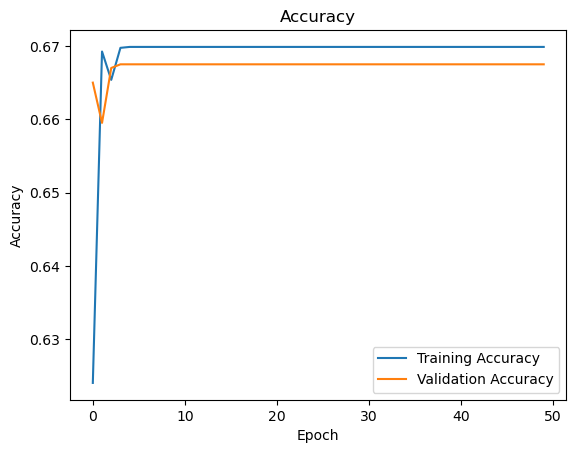

In [15]:
#Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

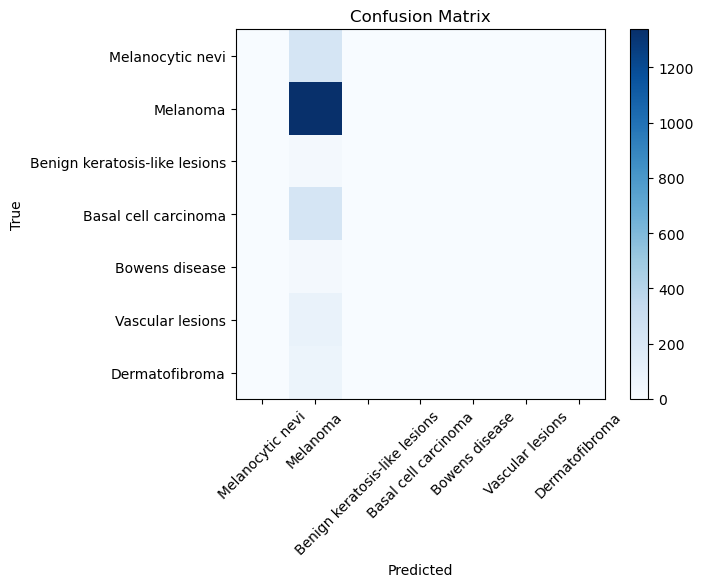

In [19]:
#plot confusion matrix
plt.imshow(confusion_mat, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

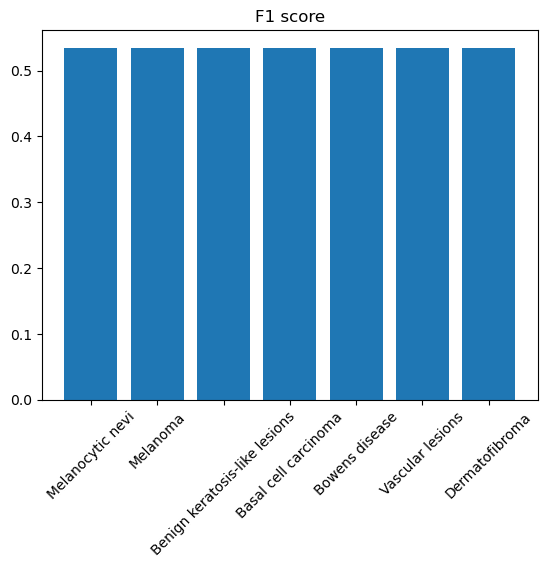

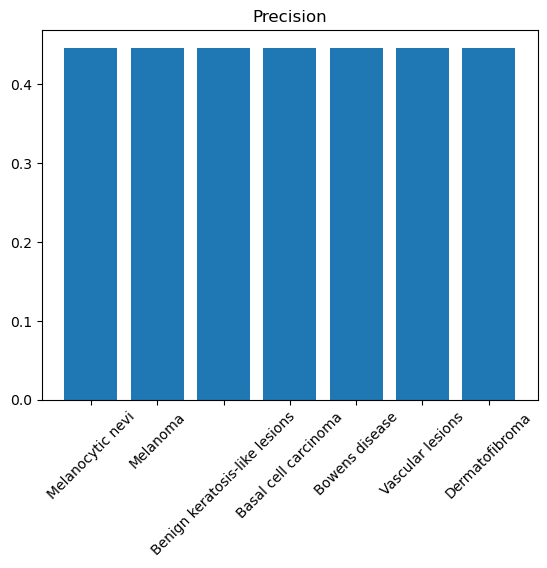

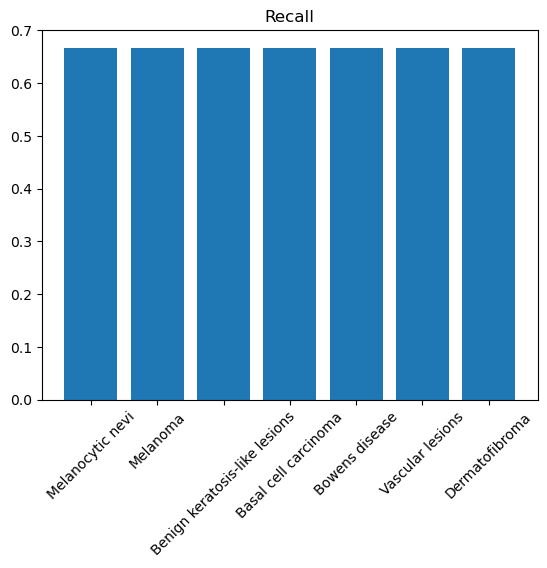

In [18]:
# Plot F1 score, precision, and recall
labels = ['Melanocytic nevi', 'Melanoma', 'Benign keratosis-like lesions', 'Basal cell carcinoma', 'Bowens disease', 'Vascular lesions', 'Dermatofibroma']
metrics = [f1, precision, recall]
metric_names = ['F1 score', 'Precision', 'Recall']
for i, metric in enumerate(metrics):
    plt.bar(labels, metric)
    plt.title(metric_names[i])
    plt.xticks(rotation=45)
    plt.show()

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2092814445495605
Test accuracy: 0.667498767375946
